In [1]:
import numpy as np
import pathlib
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [6]:
input_shape = (399,)
batch_size = 16

cwd = os.getcwd()
x_train_dir = pathlib.Path(cwd + '/data/X_train_399.npz')
y_train_dir = pathlib.Path(cwd + '/data/Y_train_195.npz')
x_test_dir  = pathlib.Path(cwd + '/data/X_test_399.npz')
y_test_dir  = pathlib.Path(cwd + '/data/Y_test_195.npz')
checkpoint_dir = pathlib.Path('D:./TF_checkpoint/mlp/weight/')
model_dir = pathlib.Path('D:./TF_backup/mlp/mlp7_399.h5')

x_train = np.asarray(np.load(x_train_dir, allow_pickle=True)['arr_0'], dtype=np.float32)
y_train = np.asarray(np.load(y_train_dir, allow_pickle=True)['arr_0'], dtype=np.float32)
x_test = np.asarray(np.load(x_test_dir, allow_pickle=True)['arr_0'], dtype=np.float32)
y_test = np.asarray(np.load(y_test_dir, allow_pickle=True)['arr_0'], dtype=np.float32)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    checkpoint_dir,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
)

In [4]:
print(np.shape(x_train))

(6720, 399)


In [5]:
normalizer = layers.Normalization()
normalizer.adapt(x_train)

# Define model
input_layer = layers.Input(shape=input_shape)
norm = normalizer(input_layer)
den1 = layers.Dense(512, activation='relu', kernel_initializer='HeNormal')(norm)
drop1 = layers.Dropout(0.2)(den1)
den2 = layers.Dense(512, activation='relu', kernel_initializer='HeNormal')(drop1)
drop2 = layers.Dropout(0.2)(den2)
den3 = layers.Dense(256, activation='relu', kernel_initializer='HeNormal')(drop2)
drop3 = layers.Dropout(0.2)(den3)
den4 = layers.Dense(14, activation='softmax')(drop3)
model = keras.Model(input_layer, den4)

opt = tf.keras.optimizers.SGD(
    learning_rate=0.0001,
    momentum=0.8,
    nesterov=True,
    name='SGD',
)

model.compile(
    optimizer=opt, 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
    )

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 399)]             0         
                                                                 
 normalization (Normalizatio  (None, 399)              799       
 n)                                                              
                                                                 
 dense (Dense)               (None, 512)               204800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                             

In [12]:
epochs = 40
model.fit(x_train, y_train, batch_size=batch_size, shuffle=True, epochs=epochs, callbacks=[model_checkpoint])
model.save(model_dir)

Epoch 1/40
420/420 [==============================] - 2s 5ms/step - loss: 0.8063 - accuracy: 0.7083
Epoch 2/40
420/420 [==============================] - 2s 4ms/step - loss: 0.7867 - accuracy: 0.7259
Epoch 3/40
420/420 [==============================] - 2s 4ms/step - loss: 0.7801 - accuracy: 0.7272
Epoch 4/40
420/420 [==============================] - 2s 4ms/step - loss: 0.7808 - accuracy: 0.7240
Epoch 5/40
420/420 [==============================] - 2s 4ms/step - loss: 0.7719 - accuracy: 0.7222
Epoch 6/40
420/420 [==============================] - 2s 4ms/step - loss: 0.7493 - accuracy: 0.7400
Epoch 7/40
420/420 [==============================] - 2s 4ms/step - loss: 0.7376 - accuracy: 0.7362
Epoch 8/40
420/420 [==============================] - 2s 4ms/step - loss: 0.7461 - accuracy: 0.7366
Epoch 9/40
420/420 [==============================] - 2s 4ms/step - loss: 0.7235 - accuracy: 0.7458
Epoch 10/40
420/420 [==============================] - 2s 4ms/step - loss: 0.7207 - accuracy: 0.7445

In [13]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

53/53 [==============================] - 0s 4ms/step - loss: 0.7822 - accuracy: 0.7185
Test loss: 0.7821994423866272
Test accuracy: 0.7184523940086365


In [13]:
print(np.shape(np.array([x_test])))

(1, 1680, 219)


array([[ 97,  17,   0,   0,   1,   0,   0,   1,   0,   0,   0,   0,   0,
          1],
       [  7,  85,   0,   0,   0,   0,   0,  15,   0,   0,   0,   0,   0,
          0],
       [  0,   0,  86,  10,   0,   3,   2,   0,   0,   1,   0,   0,   0,
          0],
       [  0,   0,  17,  44,  13,   2,   0,   0,   0,  12,   5,   0,   0,
          0],
       [  0,   0,   3,  28,  65,   2,   0,   0,   0,   1,   8,   6,   0,
          0],
       [  0,   0,   0,   0,   0,  94,   0,   0,   0,   0,   0,   0,   8,
          0],
       [ 10,   0,   9,   0,   0,   0, 109,   0,   0,   1,   0,   0,   0,
          2],
       [  2,  18,   0,   0,   0,   0,   0, 102,   0,   1,   0,   0,   0,
          1],
       [  3,   0,   3,   0,   0,   0,   0,   0, 120,   2,   0,   0,   0,
          0],
       [  0,   0,   2,  11,   0,   1,   0,   2,   0,  55,   7,   0,   0,
          0],
       [  0,   0,   0,  17,  20,   1,   0,   0,   0,  44,  31,  17,   2,
          0],
       [  0,   0,   0,  10,  21,   4,   0, 

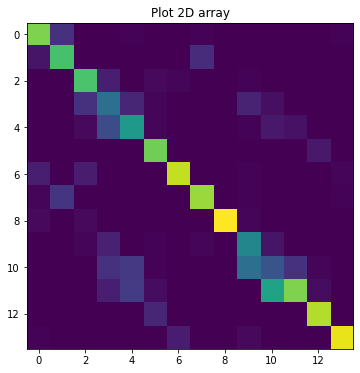

In [14]:
# draw confusion matrix
import sys
def progress(count, total, status=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
    sys.stdout.flush() 

i = 0
cmatrix = np.zeros((14,14), dtype=np.int16)
for i in range(len(x_test)):
    progress(i, 1680)
    result = model.predict(np.array([x_test[i]])).flatten()
    id1 = np.argmax(result)
    id2 = np.argmax(y_test[i])
    cmatrix[id1][id2] = cmatrix[id1][id2] + 1
    # break

cmatrix = np.absolute(cmatrix)
print(repr(cmatrix))

fig = plt.figure(figsize=(6,6))
plt.imshow(cmatrix)
plt.title("Plot 2D array")
plt.show()

Confusion:
flatten vs brittle
comp purple vs plated purple
